In [2]:
from database.MongoDBConnector import MongoDBConnector
from utils.fetal_heart_rate import *

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
mongo = MongoDBConnector(mode='remote')

In [4]:
onset_data = await mongo.get_all_documents(coll_name="model_data_onset")
print(len(onset_data))

/Users/zhichao/Documents/E3A/data-processing/venv/lib/python3.13/site-packages/pymongo/synchronous/collection.py:1954: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)


3733



### FHR Preprocessing

In [5]:
fhr_data = [np.array(i["fhr"], dtype=float) for i in onset_data]

In [6]:
fhr_cleaned = []
for i in tqdm(fhr_data):

    cleaned     = fhr_preprocess(i)
    coverage    = coverage_pct(cleaned)

    if coverage >= 70:
        fhr_cleaned.append(cleaned)

print(f"Valid: {len(fhr_cleaned)}/{len(fhr_data)}")

  0%|          | 0/3733 [00:00<?, ?it/s]/Users/zhichao/Documents/E3A/data-processing/data-processing/utils/helpers.py:17: RuntimeWarning: All-NaN slice encountered
  out[i] = np.nanmedian(w)
100%|██████████| 3733/3733 [00:35<00:00, 106.36it/s]

Valid: 3228/3733


### FHR Feature Extraction

In [7]:
fhr_features = []
for i in tqdm(fhr_cleaned):

    fhr_extracted = extract_fhr_features(i, window_s=120, stride_s=30, coverage_thresh=0.8)

    fhr_features.append(fhr_extracted)

100%|██████████| 3228/3228 [01:46<00:00, 30.42it/s]


In [8]:
sample = 11

pd.DataFrame(fhr_features[sample])

,t_start,t_end,coverage,fhr_mean,fhr_median,fhr_sdnn,fhr_rmssd,fhr_range,fhr_skew,fhr_kurt,...,fhr_decel_count,fhr_decel_amp_mean,fhr_decel_dur_mean,fhr_decel_auc_mean,psd_total,psd_vlf,psd_lf,psd_hf,ratio_lf_hf,ratio_vlf_total
0,120,240,0.966667,153.189655,153.000,3.949494,3.239699,25.0,1.803808,7.282073,...,0,0.0,0.0,0.0,5.405977,1.252282,2.841285,1.312410,2.164937,0.231648
1,150,270,0.966667,151.612069,151.000,2.774955,3.163652,21.0,-0.052301,5.311714,...,0,0.0,0.0,0.0,4.992619,2.263116,1.609151,1.120352,1.436291,0.453292
2,180,300,0.933333,153.035714,151.000,5.233173,3.034338,29.0,1.373480,4.675858,...,0,0.0,0.0,0.0,8.942124,6.430410,0.880603,1.631112,0.539879,0.719114
3,210,330,0.916667,152.890909,151.000,6.241832,3.218353,29.0,0.852026,3.159533,...,0,0.0,0.0,0.0,30.609442,20.967877,7.725360,1.916205,4.031595,0.685013
4,240,360,0.850000,151.754902,150.000,7.046432,3.248762,29.0,0.905654,2.773809,...,0,0.0,0.0,0.0,44.771017,23.610451,19.583265,1.577301,12.415684,0.527360
5,270,390,0.850000,151.205882,148.500,7.438644,3.766712,29.0,0.895209,2.612326,...,0,0.0,0.0,0.0,16.667180,9.378766,6.015183,1.273230,4.724349,0.562709
6,300,420,0.883333,147.349057,147.000,5.446349,3.929134,29.0,1.061392,4.777051,...,0,0.0,0.0,0.0,10.277811,3.046549,5.384926,1.846336,2.916547,0.296420
7,330,450,0.933333,145.830357,146.750,4.883117,4.140549,34.0,-0.661986,5.191964,...,0,0.0,0.0,0.0,20.184728,5.315738,12.461899,2.407090,5.177163,0.263354
8,360,480,1.000000,146.712500,147.000,5.860390,4.061761,36.0,0.032607,4.324717,...,0,0.0,0.0,0.0,22.767583,4.122656,16.807892,1.837034,9.149472,0.181076
9,390,510,1.000000,147.125000,146.750,7.350113,3.517663,38.0,0.574277,3.511514,...,0,0.0,0.0,0.0,18.642409,10.061194,7.618120,0.963095,7.910040,0.539694


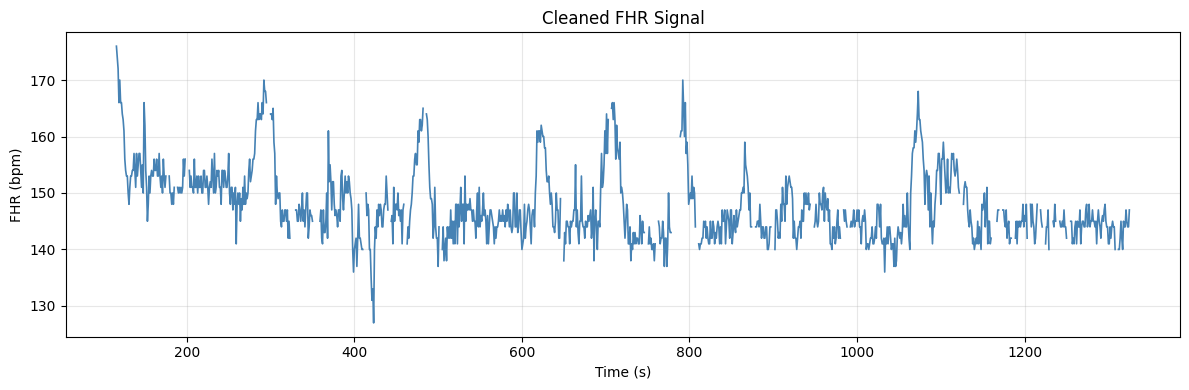

In [9]:
t = np.arange(len(fhr_cleaned[sample])) / 1.0

plt.figure(figsize=(12, 4))
plt.plot(t, fhr_cleaned[sample], lw=1.2, color='steelblue')
plt.xlabel("Time (s)")
plt.ylabel("FHR (bpm)")
plt.title("Cleaned FHR Signal")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()